In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import metrics
from sklearn import datasets

In [31]:
df = pd.read_csv('/Users/sonu/Documents/aiml/assignments/c3/4/liver_disease_.csv')
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [32]:
# finding row with missing values
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)
# The missing values a

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio Dataset  
209      3.9                         NaN     Yes  
241      3.1                         NaN     Yes  
253      2.7                         NaN      No  
312      4.8            

In [33]:
# replacing missing values with mean, since there are no evident outliers that could bias the model
agr_mean = df['Albumin_and_Globulin_Ratio'].mean()
df['Albumin_and_Globulin_Ratio'].fillna(agr_mean, inplace=True)
# gender has whitespace
df['Gender'] = df['Gender'].str.strip()

In [34]:
# convert gender to Ordinal
# replace categorical feautures with numerical labels as KNN wont work with non numerical data
df['Gender'] = df['Gender'].replace({"Male":1})
df['Gender'] = df['Gender'].replace({"Female":0})

In [35]:
# Separate the data into variables and result
X = df.drop('Dataset', axis=1).values
y = df['Dataset'].values

numf = X.size/y.size
print("Num Features :", numf)

Num Features : 10.0


In [36]:
# Load the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42, stratify=y)

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

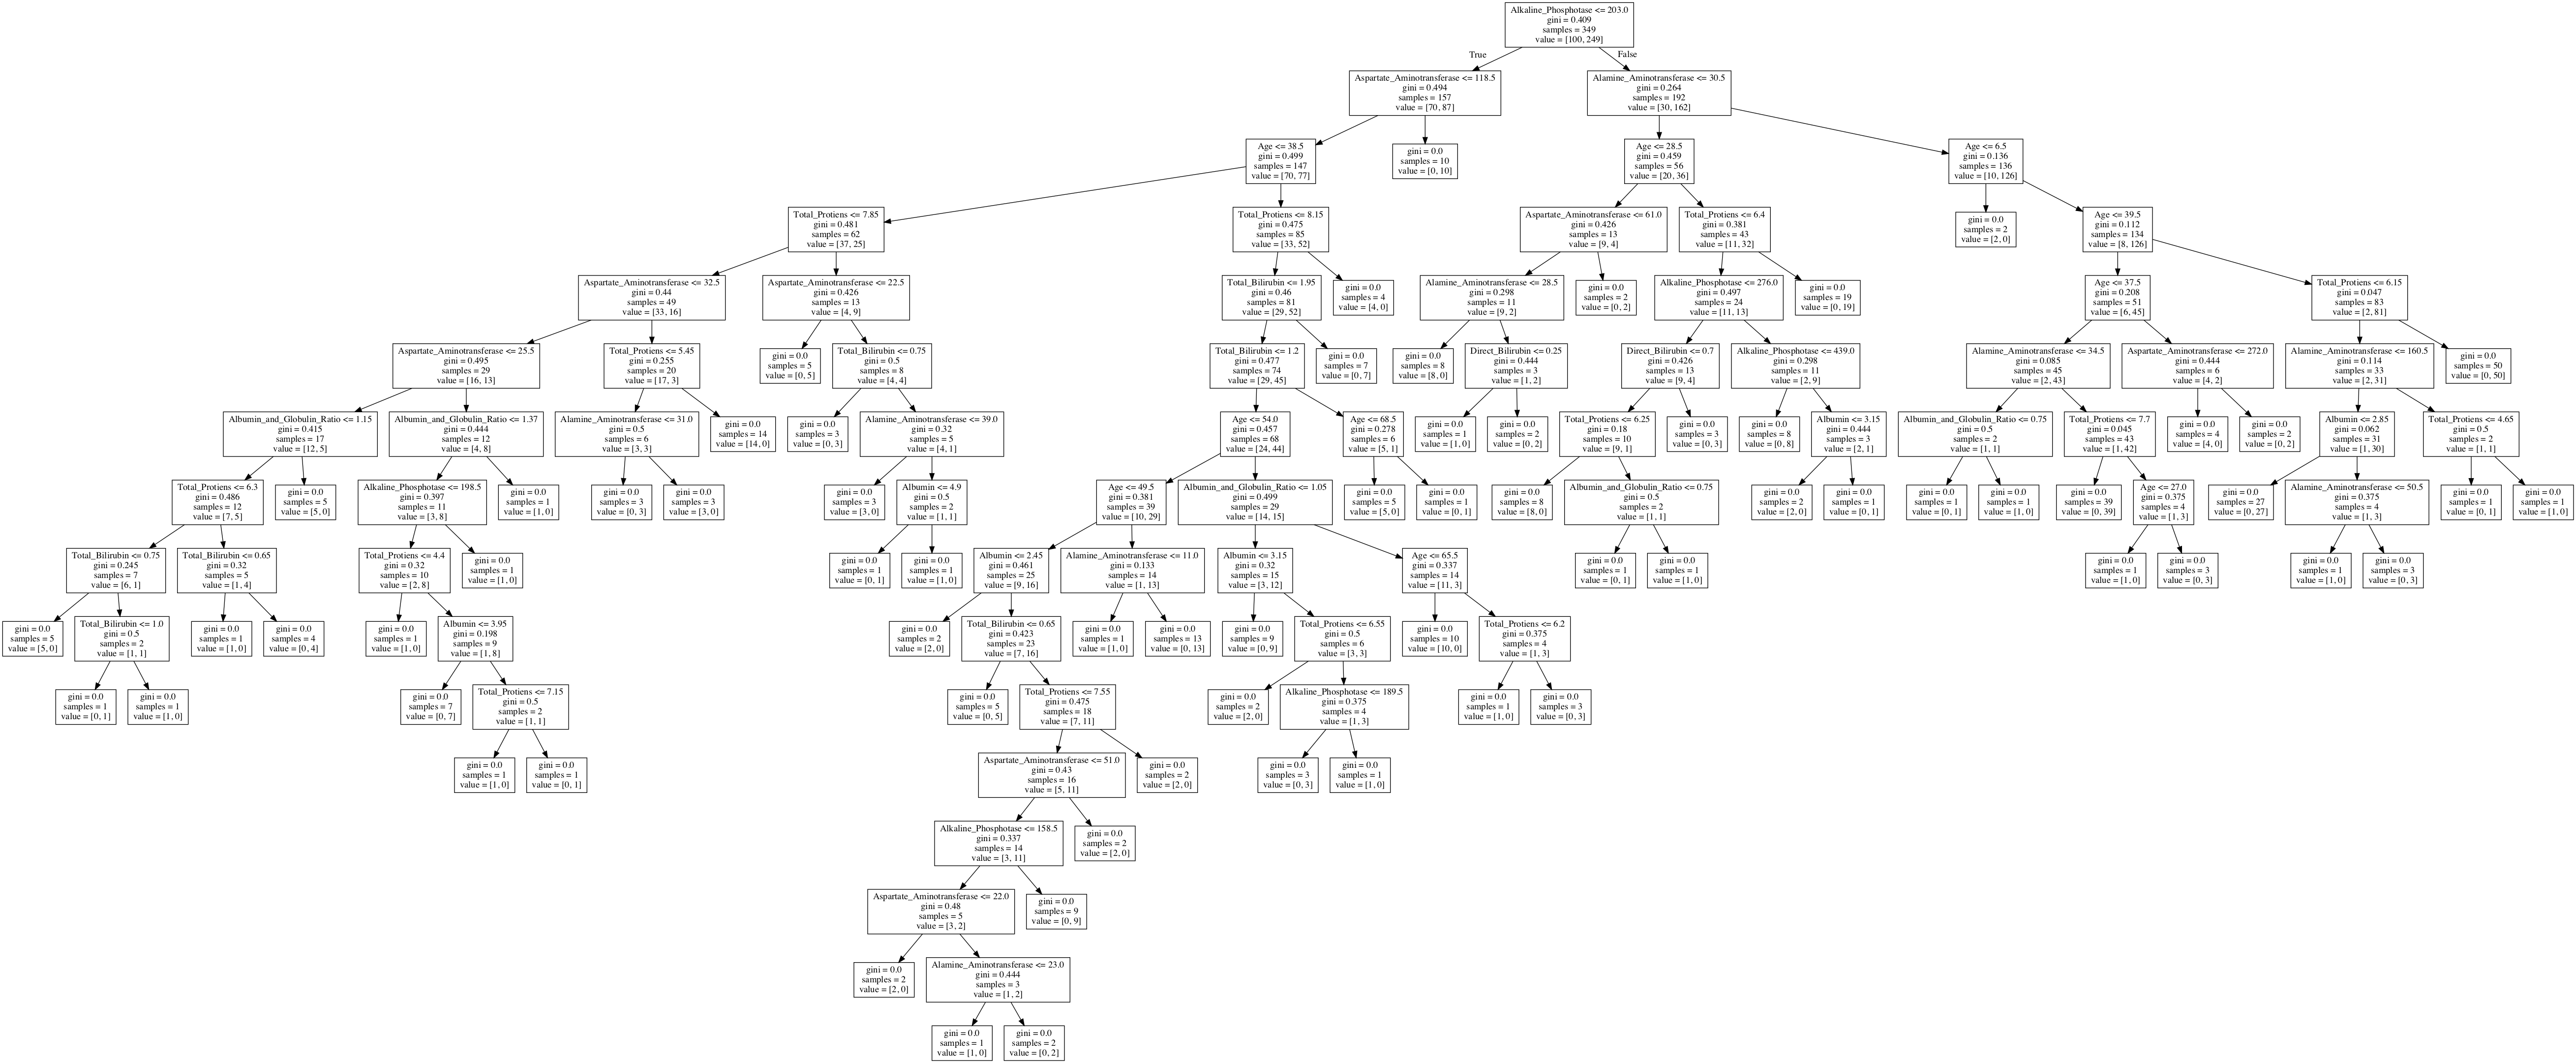

In [42]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from pydot import graph_from_dot_data
from IPython.display import Image 

dot_data = StringIO()
features = df.columns.values

export_graphviz(dt, out_file=dot_data, feature_names=features[:len(features)-1])
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [43]:
# Accuracy
y_pred = dt.predict(X_test)
pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'], margins=True)

Actual,No,Yes,All
Predicted,,,
No,27,51,78
Yes,40,116,156
All,67,167,234


In [44]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.35      0.40      0.37        67
         Yes       0.74      0.69      0.72       167

   micro avg       0.61      0.61      0.61       234
   macro avg       0.54      0.55      0.55       234
weighted avg       0.63      0.61      0.62       234



In [48]:
print(dt.score(X_test,y_test))

0.6111111111111112


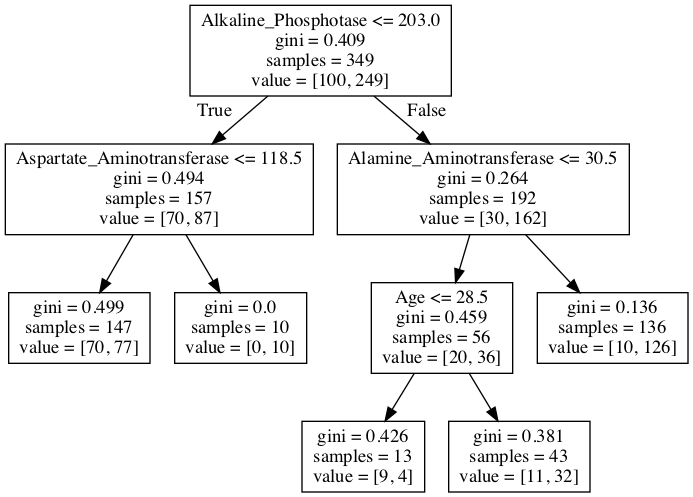

In [77]:
# pruning tree
dt = tree.DecisionTreeClassifier(criterion = "gini",
                                 splitter = 'best',
                                 max_leaf_nodes = 5,
                                 min_samples_leaf = 10,
                                 max_depth= 10)
dt = dt.fit(X_train, y_train)
dot2_data = StringIO()

export_graphviz(dt, out_file=dot2_data, feature_names=features[:len(features)-1])
(graph, ) = graph_from_dot_data(dot2_data.getvalue())
Image(graph.create_png())

In [78]:
print(dt.score(X_test,y_test))

0.7051282051282052


In [79]:
y_pred = dt.predict(X_test)
pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'], margins=True)

Actual,No,Yes,All
Predicted,,,
No,2,4,6
Yes,65,163,228
All,67,167,234
